# Лабораторная работа 3.4.5 Петля гистерезиса

In [3]:
#Импортирование библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 
from scipy.interpolate import interp1d
#%matplotlib inline
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Схема установки

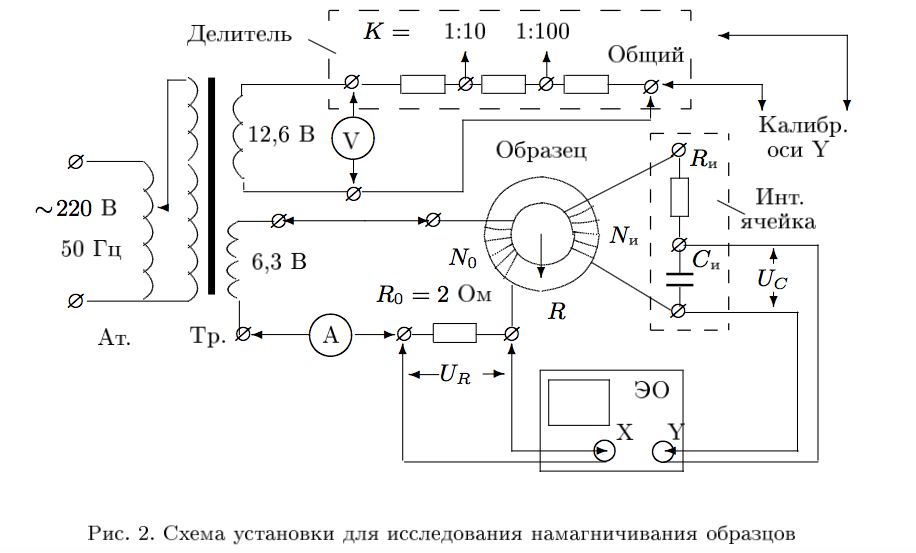

In [4]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/lab2.png')

In [5]:
one={'name':"Феррит",'N_0':45,'N_U':400,'S,cm':3,'$2\pi r$,cm':25}
two={'name':"Пермаллой",'N_0':15,'N_U':300,'S,cm':0.66,'$2\pi r$,cm':14.1}
three={'name':"Кремнистое железо",'N_0':20,'N_U':200,'S,cm':2,'$2\pi r$,cm':11}

## Феррит

In [6]:
x_1 = np.sort(np.array([3.1, 2.8, 2.4, 1.9, 1.6, 1.2, 0.8, 0.4, 0.3, 0.1]))
y_1 = np.sort(np.array([2.7, 2.6, 2.6, 2.5, 2.4, 2.3, 2, 1.4, 1.2, 0.3]))
x_1_left = np.sort(np.array([3.1, 1.9, 1.5, 1, 0.6, 0.2, 0, -0.1, -0.2, -0.2]))
x_1_right = np.sort(np.array([3.1,1.9, 1.5, 1, 0.7, 0.3, 0.4, 0.2, 0.2, 0.2]))
y_1_static = np.sort(np.array([2.6, 2.5, 2.4, 2.2, 2, 1.6, 1.2, 0.8, 0.4, 0]))

k = 4.5


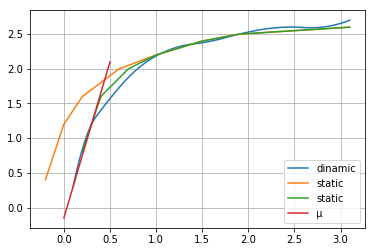

In [7]:
f_1 = interp1d(x_1, y_1, kind="quadratic")
x_1_n = np.linspace(x_1[0],x_1[-1],100)
y_1_n = f_1(x_1_n) 

f_1_left = interp1d(x_1_left, y_1_static, kind= "slinear")
x_1_left_n = np.linspace(x_1_left[0],x_1_left[-1],100)
y_static_left_n = f_1_left(x_1_left_n)

f_1_right = interp1d(x_1_right, y_1_static, kind= "slinear")
x_1_right_n = np.linspace(x_1_right[0],x_1_right[-1],100)
y_static_right_n = f_1_right(x_1_right_n)

plt.plot(x_1_n, y_1_n, label = "dinamic")
plt.plot(x_1_left_n, y_static_left_n, label="static")
plt.plot(x_1_right_n, y_static_right_n, label="static")

k_1, b_1 = mnkGP(x_1[:2], y_1[:2])
x_tan_1 = np.linspace(0,0.5,10)
y_tan_1 = k_1*x_tan_1 + b_1
plt.plot(x_tan_1,y_tan_1, label="µ")
print(f"k = {k_1.round(2)}")
plt.legend()
plt.grid()

## Пермаллой

In [37]:
x_2 = np.sort(np.array([3.6, 2, 1, 0.5, 0]))
y_2 = np.sort(np.array([1.6,1.4, 0.8,0.2, 0]))
x_2_left = np.sort(np.array([3.6, 2, 1, -1, -2, -2.1, -2.2, -2.3]))
y_2_static_left = np.sort(np.array([1.6, 1.59, 1.58, 1.57, 1.56, 1, 0.5, 0]))
x_2_right = np.sort(np.array([3.6, 3, 2.5, 2.4, 2.2]))
y_2_static_right = np.sort(np.array([1.6, 1.5, 1, 0.4, 0]))





k = 1.2


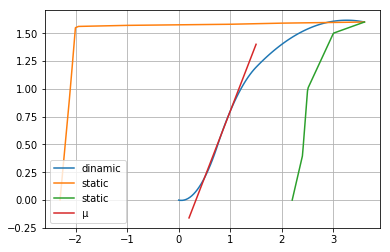

In [38]:
f_2 = interp1d(x_2, y_2, kind="quadratic")
x_2_n = np.linspace(x_2[0],x_2[-1],100)
y_2_n = f_2(x_2_n) 
f_2_left = interp1d(x_2_left, y_2_static_left, kind= "linear")
x_2_left_n = np.linspace(x_2_left[0],x_2_left[-1],100)
y_static_left_n_2 = f_2_left(x_2_left_n)
f_2_right = interp1d(x_2_right, y_2_static_right, kind= "linear")
x_2_right_n = np.linspace(x_2_right[0],x_2_right[-1],100)
y_static_right_n_2 = f_2_right(x_2_right_n)

plt.plot(x_2_n, y_2_n, label = "dinamic")
plt.plot(x_2_left_n, y_static_left_n_2, label="static")
plt.plot(x_2_right_n, y_static_right_n_2, label="static")

k_2, b_2 = mnkGP(x_2[1:3], y_2[1:3])
x_tan_2 = np.linspace(0.2,1.5,10)
y_tan_2 = k_2*x_tan_2 + b_2
plt.plot(x_tan_2,y_tan_2, label="µ")
print(f"k = {k_2.round(2)}")

plt.legend()
plt.grid()

## Кремнистое железо

In [39]:
x_3 = np.sort(np.array([4.3, 3, 2, 1,0.5, -0.1]))
y_3 = np.sort(np.array([2.8, 2.2, 1.4, 0.4, 0.2,0]))
x_3_left = np.sort(np.array([4.3, 3, 2.5, 2, 1.4,1, 0, -0.6, -1, -1.9]))
y_3_static_left = np.sort(np.array([2.8, 2.6, 2.5, 2.4, 2.2,2, 1.5, 1.2, 0.9, 0]))
x_3_right = np.sort(np.array([4.3, 3.8, 3.3, 3, 2.5, 2.2, 1.8]))
y_3_static_right = np.sort(np.array([2.8, 2.5, 2, 1.6, 1, 0.5, 0]))

k = 1.0


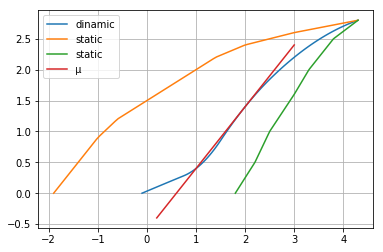

In [40]:
f_3 = interp1d(x_3, y_3, kind="quadratic")
x_3_n = np.linspace(x_3[0],x_3[-1],100)
y_3_n = f_3(x_3_n) 

f_3_left = interp1d(x_3_left, y_3_static_left, kind= "linear")
x_3_left_n = np.linspace(x_3_left[0],x_3_left[-1],100)
y_static_left_n_3 = f_3_left(x_3_left_n)

f_3_right = interp1d(x_3_right, y_3_static_right, kind= "linear")
x_3_right_n = np.linspace(x_3_right[0],x_3_right[-1],100)
y_static_right_n_3 = f_3_right(x_3_right_n)

plt.plot(x_3_n, y_3_n, label = "dinamic")
plt.plot(x_3_left_n, y_static_left_n_3, label="static")
plt.plot(x_3_right_n, y_static_right_n_3, label="static")



k_3, b_3 = mnkGP(x_3[2:4], y_3[2:4])
x_tan_3 = np.linspace(0.2,3,10)
y_tan_3 = k_3*x_tan_3 + b_3
plt.plot(x_tan_3,y_tan_3, label="µ")
print(f"k = {k_3.round(2)}")
plt.legend()
plt.grid()

## Нахождение калибровок

### каллибровка для x

## $H=\frac{I N_0}{2\pi R }=\frac{K_X N_0}{2\pi R R_0}$  $[\frac{A}{m}]$

### каллибровка для y

## $B=\frac{R_u C_u K_y}{S N_u}$   Tл

### Мы измеряли Ферит на $K_Y=20mV$ и $K_X=20mV$.Найдем каллибровки.

In [56]:
R_0=0.2
R_u=20000
C_u=20*10**(-6)
K_x_one=20*10**(-3)
K_y_one=20*10**(-3)
H_one=K_x_one*one['N_0']/(one['$2\pi r$,cm']*10**(-2)*R_0) #в сантиметрах и mV
B_one=R_u*C_u*K_y_one/(one['S,cm']*10**(-4)*one['N_U'])
print(f"H_one is {H_one}, B_one is {round(B_one, 3)}")


H_one is 18.0, B_one is 0.067


### Мы измеряли Пермаллой на $K_Y=50mV$ и $K_X=20mV$.Найдем каллибровки.

In [57]:
R_0=0.2
R_u=20000
C_u=20*10**(-6)
K_x_two=20*10**(-3)
K_y_two=50*10**(-3)
H_two=K_x_two*two['N_0']/(two['$2\pi r$,cm']*10**(-2)*R_0)
B_two=R_u*C_u*K_y_two/(two['S,cm']*10**(-4)*two['N_U'])
print(f"H_two is {H_two}, B_two is {round(B_two,2)}")

H_two is 10.638297872340425, B_two is 1.01


### Мы измеряли Кремнистое железо на $K_Y=10mV$ и $K_X=20mV$.Найдем каллибровки.

In [43]:
R_0=0.2
R_u=20000
C_u=20*10**(-6)
K_x_three=20*10**(-3)
K_y_three=10*10**(-3)
H_three=K_x_three*three['N_0']/(three['$2\pi r$,cm']*10**(-2)*R_0)
B_three=R_u*C_u*K_y_three/(three['S,cm']*10**(-4)*three['N_U'])
print(f"H_three is {H_three}, B_three is {round(B_three,4)}")

H_three is 18.18181818181818, B_three is 0.1


## Проверка каллибровки

### $m_x=\frac{2R_0\sqrt{2}I_{ef}}{2x}$ $[\frac{B}{del}]$

## $\delta m_x=m_x(\frac{\delta I_{ef}}{I_{ef}}+\frac{\delta x}{x})$

### Наши измерения:x=4.6 дел, $I_{ef}=320.31 mA$, $K_X=20mV$

In [44]:
I_ef=320.31*10**(-3)
K_x=20*10**(-3)
x=4.6

m_x=2*R_0*2**(0.5)*I_ef/(2*4.6)
dm_x=(0.2/4.6+0.03)*m_x
print(f"Полученное значение:{round(m_x,4)}+-{round(dm_x,4)},ожидаемое значение:{K_x}")

Полученное значение:0.0197+-0.0014,ожидаемое значение:0.02


## $m_Y=\frac{2\sqrt{2}U_{ef}}{2y}$ $[\frac{B}{del}]$

## $\delta m_Y=m_Y(\frac{\delta U_{ef}}{U_{ef}}+\frac{\delta y}{y})$

### Наши измерения:y=3.8 дел, $V_{ef}=0.0536 V$, $K_Y=20mV$

In [66]:
V_ef=0.0536
K_y=20*10**(-3)
y=3.8
m_y=2*2**(0.5)*V_ef/(2*y)
dm_y=(0.03+1/3.9)*m_y
print(f"Полученное значение: 0.020+-{round(dm_y,3)},ожидаемое значение:{K_y}")

Полученное значение: 0.020+-0.006,ожидаемое значение:0.02


### Наши измерения:y=3.8 дел, $V_{ef}=0.1343 V$, $K_Y=50mV$

In [46]:
V_ef=0.1343
K_y=50*10**(-3)
y=3.8
m_y=2*2**(0.5)*V_ef/(2*y)
dm_y=(0.03+1/3.9)*m_y
print(f"Полученное значение:{round(m_y,4)}+-{round(dm_y,4)},ожидаемое значение:{K_y}")

Полученное значение:0.05+-0.0143,ожидаемое значение:0.05


## Измеряем количество делений и $K_Y$. Находим $U_{out}=\alpha_1 K_{Y1}$ и $U_{in}=\alpha_2 K_{Y2}$

In [47]:
alpha_1=3.2
alpha_2=4
K_y1=0.2
K_y2=2
RC_0=0.4
RC=alpha_2*K_y2/(alpha_1*K_y1*50*2*3.14)
dRC=RC*(1.0/32+1.0/40)
print(f"Получили:{round(RC,4)}+-{round(dRC,4)}; ожидали:{RC_0}")

Получили:0.0398+-0.0022; ожидали:0.4


## $RC=\frac{U_{in}}{\Omega U_{out}}$

## $\delta (RC)=RC(\frac{\delta \alpha_1}{\alpha_1}+\frac{\delta K_{y1}}{K_{y1}}+\frac{\delta \alpha_2}{\alpha_2}+\frac{\delta K_{y2}}{K_{y2}})$

### Условие $R>>\frac{1}{\Omega C}$ выполнено

In [48]:
print(f"RC={RC}>>{1/(2*3.14*50)}")

RC=0.039808917197452214>>0.0031847133757961785


## Нахождение $B_s$ и $H_c$ для каждого образца

## $|B|=\frac{R_uC_u}{SN_u}U_{out}$

In [49]:
H_c_one=round(H_one*0.4,2)
H_c_two=round(H_two*2.3,2)
H_c_three=round(H_three*1.9,2)
B_s_one=round(B_one*2.5,4)
B_s_two=round(B_two*1.6,4)
B_s_three=round(B_three*2.8,4)


dH_c_one=H_c_one*(0.1/0.4)
dH_c_two=H_c_two*(0.1/2.3)
dH_c_three=H_c_three*(0.1/1.9)

dB_s_one=B_s_one*(1/2.5)
dB_s_two=B_s_two*(1/2.5)
dB_s_three=B_s_three*(1/2.5)
print(f"Для первого({one['name']}) B_s={round(B_s_one,4)}+-{round(dB_s_one,4)},H_c={H_c_one}+-{dH_c_one}")
print(f"Для второго({two['name']}) B_s={round(B_s_two,4)}+-{round(dB_s_two,4)},H_c={round(H_c_two,4)}+-{round(dH_c_two,4)}")
print(f"Для третьего({three['name']}) B_s={round(B_s_three,4)}+-{round(dB_s_three,4)},H_c={round(H_c_three,4)}+-{round(dH_c_three,4)}")

Для первого(Феррит) B_s=0.1667+-0.0667,H_c=7.2+-1.8
Для второго(Пермаллой) B_s=1.6162+-0.6465,H_c=24.47+-1.0639
Для третьего(Кремнистое железо) B_s=0.28+-0.112,H_c=34.55+-1.8184


## $\mu_{diff}=\frac{1}{\mu_0}\frac{dB}{dH}$

In [58]:
m_diff_one=(B_one/H_one*k_1*1/(1.26*10**(-6))).round(2)
m_diff_two=(B_two/H_two*k_2*1/(1.26*10**(-6))).round(2)
m_diff_three=(B_three/H_three*k_1*1/(1.26*10**(-6))).round(2)

In [59]:
pd_one=pd.DataFrame({'$B_s$':np.array([B_s_one,0.2]),'$H_c$':np.array([H_c_one,8]),'$\mu_{diff}$':np.array([m_diff_one,0])})
pd_two=pd.DataFrame({'$B_s$':np.array([B_s_two,1.08]),'$H_c$':np.array([H_c_two,4]),'$\mu_{diff}$':np.array([m_diff_two,0])})
pd_three=pd.DataFrame({'$B_s$':np.array([B_s_three,2.0]),'$H_c$':np.array([H_c_three,8]),'$\mu_{diff}$':np.array([m_diff_three,0])})

In [60]:
print(f"Это {one['name']}")
pd_one

Это Феррит


,$B_s$,$H_c$,$\mu_{diff}$
0,0.1667,7.2,13227.51
1,0.2000,8.0,0.00


In [61]:
print(f"Это {two['name']}")
pd_two

Это Пермаллой


,$B_s$,$H_c$,$\mu_{diff}$
0,1.6162,24.47,90428.09
1,1.0800,4.00,0.00


In [62]:
print(f"Это {three['name']}")
pd_three

Это Кремнистое железо


,$B_s$,$H_c$,$\mu_{diff}$
0,0.28,34.55,19642.86
1,2.00,8.00,0.00


# Вывод : по характерной кривой $B(H)$ можно сделать вывод, что мы работали именно с феромагнентиками. Таким образом, мы исследовали поведение ферамагнетиков при действии на них в магнитного поля. Видно, что значения коэрцитивной силы и индукции магнитного насыщения в целом согласуются с табличными значениями по порядку величины, а для Феррита полученные значения лежат в пределах погрешности табличных значений. Предположение о том, что $U_{out} << U_{inp}$ оправдалось, нормировка осциллографа оказалась не сбита, а методы измерения B и H достаточно точны.